In [1]:
from datetime import datetime, timedelta

from efootprint.abstract_modeling_classes.source_objects import SourceValue, Sources, SourceObject
from efootprint.abstract_modeling_classes.empty_explainable_object import EmptyExplainableObject

from efootprint.core.usage.usage_journey import UsageJourney
from efootprint.core.usage.usage_journey_step import UsageJourneyStep
from efootprint.core.usage.job import Job
from efootprint.core.usage.usage_pattern import UsagePattern

from efootprint.core.hardware.server import Server, ServerTypes
from efootprint.core.hardware.storage import Storage
from efootprint.core.hardware.network import Network
from efootprint.core.hardware.device import Device

from efootprint.core.system import System
from efootprint.constants.countries import Countries
from efootprint.constants.units import u

from efootprint.builders.time_builders import (
    linear_growth_hourly_values,
    sinusoidal_fluct_hourly_values,
    daily_fluct_hourly_values,
)

from efootprint.utils.object_relationships_graphs import (
    USAGE_PATTERN_VIEW_CLASSES_TO_IGNORE,
    INFRA_VIEW_CLASSES_TO_IGNORE
)


# Defining storage components

In [2]:

# SSD storage configuration
# TODO  : Update values according to sources
central_storage = Storage(
    "SSD storage",
    # TODO : Check if these values fit our actual infrastructure
    carbon_footprint_fabrication_per_storage_capacity=SourceValue(160 * u.kg / u.TB, Sources.STORAGE_EMBODIED_CARBON_STUDY),
    power_per_storage_capacity=SourceValue(1.3 * u.W / u.TB, Sources.STORAGE_EMBODIED_CARBON_STUDY),
    lifespan=SourceValue(6 * u.years, Sources.HYPOTHESIS),
    idle_power=SourceValue(0 * u.W, Sources.HYPOTHESIS),

    #  heatmaps + raw data storage footprint
    # TODO : What requirements will we specify for our volume ?
    storage_capacity=SourceValue(10 * u.TB, Sources.HYPOTHESIS),
    data_replication_factor=SourceValue(2 * u.dimensionless, Sources.HYPOTHESIS),
    data_storage_duration=SourceValue(3 * u.year, Sources.HYPOTHESIS),
    base_storage_need=SourceValue(500 * u.GB, Sources.HYPOTHESIS),

    fixed_nb_of_instances=EmptyExplainableObject() 
)


# TODO : Default storage associated with each device and VM - No need pragmaticaally - Only for serve definition
# TODO : Adjust storage capacity
data_storage = Storage.from_defaults("Data storage", storage_capacity=SourceValue(2 * u.TB))
gis_storage = Storage.from_defaults("GIS storage", storage_capacity=SourceValue(2 * u.TB))
ml_storage = Storage.from_defaults("ML storage", storage_capacity=SourceValue(2 * u.TB))
alerts_storage = Storage.from_defaults("Alerts storage", storage_capacity=SourceValue(2 * u.TB))
scheduler_storage = Storage.from_defaults("Scheduler storage", storage_capacity=SourceValue(2 * u.TB))
dashboard_storage = Storage.from_defaults("Dashboard storage", storage_capacity=SourceValue(2 * u.TB))
cleaning_storage = Storage.from_defaults("Cleaning storage", storage_capacity=SourceValue(2 * u.TB))

print("Storage object created:", central_storage)

# Storage.archetypes()




Storage object created: Storage fe17d0
 
name: SSD storage
lifespan: 6.0 year
fraction_of_usage_time: 1.0 dimensionless
carbon_footprint_fabrication_per_storage_capacity: 160.0 kilogram / terabyte
power_per_storage_capacity: 1.3 watt / terabyte
idle_power: 0.0 watt
storage_capacity: 10.0 terabyte
data_replication_factor: 2.0 dimensionless
data_storage_duration: 3.0 year
base_storage_need: 500.0 gigabyte
fixed_nb_of_instances: no value
 
calculated_attributes:
  carbon_footprint_fabrication: 0.0 kilogram
  power: 0.0 watt
  storage_needed: no value
  storage_freed: no value
  automatic_storage_dumps_after_storage_duration: no value
  storage_delta: no value
  full_cumulative_storage_need: no value
  raw_nb_of_instances: no value
  nb_of_instances: no value
  nb_of_active_instances: no value
  instances_fabrication_footprint: no value
  instances_energy: no value
  energy_footprint: no value



# VM infrastructure

In [3]:
# TODO : Document from OpenStack VMs caracteristics
# TODO : find any baseline to estimate such consumptions - Very different from a sevrer to another

data_vm = Server.from_defaults(
    "Data Service VM",
    server_type=ServerTypes.autoscaling(),
    power_usage_effectiveness=SourceValue(1.2 * u.dimensionless, Sources.HYPOTHESIS),   # TODO : a way to extract that data ?
    average_carbon_intensity=SourceValue(25 * u.g / u.kWh, Sources.HYPOTHESIS),         # Source : https://www.nowtricity.com/country/france/
    utilization_rate=SourceValue(0.9 * u.dimensionless, Sources.HYPOTHESIS),            # TODO : a way to extract that data ?
    base_ram_consumption=SourceValue(300 * u.MB_ram, Sources.HYPOTHESIS),               # <- 
    base_compute_consumption=SourceValue(2 * u.cpu_core, Sources.HYPOTHESIS),           # <- 
    storage=data_storage
)

# (Spatial analysis)
gis_vm = Server.from_defaults(
    "GIS Service VM",
    server_type=ServerTypes.autoscaling(),
    power_usage_effectiveness=SourceValue(1.2 * u.dimensionless, Sources.HYPOTHESIS),
    average_carbon_intensity=SourceValue(25 * u.g / u.kWh, Sources.HYPOTHESIS),
    utilization_rate=SourceValue(0.9 * u.dimensionless, Sources.HYPOTHESIS),
    base_ram_consumption=SourceValue(300 * u.MB_ram, Sources.HYPOTHESIS),
    base_compute_consumption=SourceValue(2 * u.cpu_core, Sources.HYPOTHESIS),
    storage=gis_storage
)

ml_vm = Server.from_defaults(
    "ML Prediction VM",
    server_type=ServerTypes.autoscaling(),
    power_usage_effectiveness=SourceValue(1.2 * u.dimensionless, Sources.HYPOTHESIS),
    average_carbon_intensity=SourceValue(25 * u.g / u.kWh, Sources.HYPOTHESIS),
    utilization_rate=SourceValue(0.9 * u.dimensionless, Sources.HYPOTHESIS),
    base_ram_consumption=SourceValue(300 * u.MB_ram, Sources.HYPOTHESIS),
    base_compute_consumption=SourceValue(2 * u.cpu_core, Sources.HYPOTHESIS),
    storage=ml_storage
)

alerts_vm = Server.from_defaults(
    "Alert Service VM",
    server_type=ServerTypes.autoscaling(),
    power_usage_effectiveness=SourceValue(1.2 * u.dimensionless, Sources.HYPOTHESIS),
    average_carbon_intensity=SourceValue(25 * u.g / u.kWh, Sources.HYPOTHESIS),
    utilization_rate=SourceValue(0.9 * u.dimensionless, Sources.HYPOTHESIS),
    base_ram_consumption=SourceValue(300 * u.MB_ram, Sources.HYPOTHESIS),
    base_compute_consumption=SourceValue(2 * u.cpu_core, Sources.HYPOTHESIS),
    storage=alerts_storage
)

scheduler_vm = Server.from_defaults(
    "Scheduler VM",
    server_type=ServerTypes.autoscaling(),
    power_usage_effectiveness=SourceValue(1.2 * u.dimensionless, Sources.HYPOTHESIS),
    average_carbon_intensity=SourceValue(25 * u.g / u.kWh, Sources.HYPOTHESIS),
    utilization_rate=SourceValue(0.9 * u.dimensionless, Sources.HYPOTHESIS),
    base_ram_consumption=SourceValue(300 * u.MB_ram, Sources.HYPOTHESIS),
    base_compute_consumption=SourceValue(2 * u.cpu_core, Sources.HYPOTHESIS),
    storage=scheduler_storage
)

dashboard_vm = Server.from_defaults(
    "Dashboard Backend VM",
    server_type=ServerTypes.autoscaling(),
    power_usage_effectiveness=SourceValue(1.2 * u.dimensionless, Sources.HYPOTHESIS),
    average_carbon_intensity=SourceValue(25 * u.g / u.kWh, Sources.HYPOTHESIS),
    utilization_rate=SourceValue(0.9 * u.dimensionless, Sources.HYPOTHESIS),
    base_ram_consumption=SourceValue(300 * u.MB_ram, Sources.HYPOTHESIS),
    base_compute_consumption=SourceValue(2 * u.cpu_core, Sources.HYPOTHESIS),
    storage=dashboard_storage
)

cleaning_vm = Server.from_defaults(
    "Data Cleaning VM",
    server_type=ServerTypes.autoscaling(),
    power_usage_effectiveness=SourceValue(1.2 * u.dimensionless, Sources.HYPOTHESIS),
    average_carbon_intensity=SourceValue(25 * u.g / u.kWh, Sources.HYPOTHESIS),
    utilization_rate=SourceValue(0.9 * u.dimensionless, Sources.HYPOTHESIS),
    base_ram_consumption=SourceValue(300 * u.MB_ram, Sources.HYPOTHESIS),
    base_compute_consumption=SourceValue(2 * u.cpu_core, Sources.HYPOTHESIS),
    storage=cleaning_storage
)

print("VMs constructed.")


VMs constructed.


# Periodic Server jobs

In [4]:
# TODO ; Get info from API usage - adjust data sizes, compute needs, durations

# JOB : Fetch external rainfall/flow data
fetch_external_data_job = Job(
    "Fetch external rainfall/flow data",
    server=data_vm,
    data_transferred=SourceValue(5 * u.MB, Sources.HYPOTHESIS),     # from external API
    data_stored=SourceValue(1 * u.MB, Sources.HYPOTHESIS),          # raw snapshot storage
    request_duration=SourceValue(5 * u.s, Sources.HYPOTHESIS),
    compute_needed=SourceValue(0.3 * u.cpu_core, Sources.HYPOTHESIS),
    ram_needed=SourceValue(200 * u.MB_ram, Sources.HYPOTHESIS),
)

# JOB : Data cleaning job
clean_data_job = Job(
    "Clean raw API data",
    server=cleaning_vm,
    data_transferred=SourceValue(1 * u.MB, Sources.HYPOTHESIS),     # input data from data service
    data_stored=SourceValue(1 * u.MB, Sources.HYPOTHESIS),          # cleaned data written back
    request_duration=SourceValue(10 * u.s, Sources.HYPOTHESIS),
    compute_needed=SourceValue(0.5 * u.cpu_core, Sources.HYPOTHESIS),
    ram_needed=SourceValue(400 * u.MB_ram, Sources.HYPOTHESIS),
)

# JOB : ML inference
ml_inference_job = Job(
    "Run ML flood prediction",
    server=ml_vm,
    data_transferred=SourceValue(1 * u.MB, Sources.HYPOTHESIS),     # cleaned data input
    data_stored=SourceValue(1 * u.MB, Sources.HYPOTHESIS),          # raw inference output (probabilities)
    request_duration=SourceValue(12 * u.s, Sources.HYPOTHESIS),
    compute_needed=SourceValue(1.5 * u.cpu_core, Sources.HYPOTHESIS),
    ram_needed=SourceValue(1 * u.GB_ram, Sources.HYPOTHESIS),
)

# JOB : GIS heatmap rendering
gis_heatmap_job = Job(
    "Generate GIS heatmap",
    server=gis_vm,
    data_transferred=SourceValue(1 * u.MB, Sources.HYPOTHESIS),     # ML output passed to GIS engine
    data_stored=SourceValue(2 * u.MB, Sources.HYPOTHESIS),          # heatmap tile stored
    request_duration=SourceValue(8 * u.s, Sources.HYPOTHESIS),
    compute_needed=SourceValue(0.8 * u.cpu_core, Sources.HYPOTHESIS),
    ram_needed=SourceValue(300 * u.MB_ram, Sources.HYPOTHESIS),
)


print("Jobs defined.")


Jobs defined.


# Hourly prediction Journey 

In [5]:
hourly_inference_step = UsageJourneyStep(
    "Run hourly prediction pipeline",
    user_time_spent=SourceValue(0 * u.s, Sources.HYPOTHESIS),
    jobs=[
        fetch_external_data_job,
        clean_data_job,
        ml_inference_job,
        gis_heatmap_job,
    ]
)

hourly_inference_journey = UsageJourney(
    "Periodic ML flood prediction pipeline",
    uj_steps=[hourly_inference_step]
)


2026-01-12 15:30:19,111 - INFO - Computing calculated attributes for UsageJourney Periodic ML flood prediction pipeline


# User focused jobs

In [6]:

# SUBSCRIBE ALERTS JOB
subscribe_alerts_job = Job(
    "Register user alert subscription",
    server=dashboard_vm,
    data_transferred=SourceValue(1 * u.kB, Sources.USER_DATA),   # user request payload
    data_stored=SourceValue(1 * u.kB, Sources.USER_DATA),        # writing subscriber ID
    request_duration=SourceValue(0.5 * u.s, Sources.HYPOTHESIS),
    compute_needed=SourceValue(0.05 * u.cpu_core, Sources.HYPOTHESIS),
    ram_needed=SourceValue(50 * u.MB_ram, Sources.HYPOTHESIS),
)

subscribe_alerts_step = UsageJourneyStep(
    "User subscribes to alerts",
    user_time_spent=SourceValue(5 * u.s, Sources.USER_DATA),
    jobs=[subscribe_alerts_job]
) # TODO : anything else needed ?

alert_subscription_journey = UsageJourney(
    "Alert subscription user journey",
    uj_steps=[subscribe_alerts_step]
)


# CHECK FLOOD STATUS JOB
check_status_job = Job(
    "Backend fetch flood status",
    server=dashboard_vm,
    data_transferred=SourceValue(0.1 * u.kB, Sources.HYPOTHESIS),   # tiny request-response
    data_stored=SourceValue(0 * u.kB, Sources.HYPOTHESIS),          # nothing is persisted
    request_duration=SourceValue(0.4 * u.s, Sources.HYPOTHESIS),
    compute_needed=SourceValue(0.1 * u.cpu_core, Sources.HYPOTHESIS),
    ram_needed=SourceValue(100 * u.MB_ram, Sources.HYPOTHESIS),
)

check_status_step = UsageJourneyStep(
    "Check flood status",
    user_time_spent=SourceValue(2 * u.s, Sources.USER_DATA),
    jobs=[check_status_job]
)

check_status_journey = UsageJourney(
    "Check flood status journey",
    uj_steps=[check_status_step]
)

# CONSULT SPECIFIC SEGMENTS
consult_segment_job = Job(
    "Fetch GIS segment details",
    server=gis_vm,
    data_transferred=SourceValue(1 * u.MB, Sources.USER_DATA),    # GIS tile + metadata
    data_stored=SourceValue(0 * u.MB, Sources.HYPOTHESIS),        # no persistent writes
    request_duration=SourceValue(1 * u.s, Sources.HYPOTHESIS),
    compute_needed=SourceValue(0.2 * u.cpu_core, Sources.HYPOTHESIS),
    ram_needed=SourceValue(150 * u.MB_ram, Sources.HYPOTHESIS),
)

consult_segment_step = UsageJourneyStep(
    "Consult GIS segment details",
    user_time_spent=SourceValue(8 * u.s, Sources.USER_DATA),
    jobs=[consult_segment_job]
)

consult_segment_journey = UsageJourney(
    "GIS detail lookup",
    uj_steps=[consult_segment_step]
)


# SUBSCRIBE ALERTS JOB

send_alert_job = Job(
    "Send flood alert",
    server=alerts_vm,
    data_transferred=SourceValue(5 * u.kB, Sources.HYPOTHESIS),   # push notification payload
    data_stored=SourceValue(0 * u.kB, Sources.HYPOTHESIS),        # no permanent storage
    request_duration=SourceValue(0.2 * u.s, Sources.HYPOTHESIS),
    compute_needed=SourceValue(0.1 * u.cpu_core, Sources.HYPOTHESIS),
    ram_needed=SourceValue(50 * u.MB_ram, Sources.HYPOTHESIS),
)

alert_dispatch_step = UsageJourneyStep(
    "Dispatch alert to users",
    user_time_spent=SourceValue(0 * u.s, Sources.HYPOTHESIS),     # backend only
    jobs=[send_alert_job]
)

alert_dispatch_journey = UsageJourney(
    "Alert dispatch pipeline",
    uj_steps=[alert_dispatch_step]
)



2026-01-12 15:30:19,121 - INFO - Computing calculated attributes for UsageJourney Alert subscription user journey
2026-01-12 15:30:19,124 - INFO - Computing calculated attributes for UsageJourney Check flood status journey
2026-01-12 15:30:19,125 - INFO - Computing calculated attributes for UsageJourney GIS detail lookup
2026-01-12 15:30:19,127 - INFO - Computing calculated attributes for UsageJourney Alert dispatch pipeline


# Simulate Users usage

2026-01-12 15:30:19,797 - INFO - Starting computing Flood Prediction System modeling
2026-01-12 15:30:19,797 - INFO - Computing calculated attributes for UsagePattern Hourly flood inference pattern
2026-01-12 15:30:19,800 - INFO - Computing calculated attributes for UsagePattern User activity pattern
2026-01-12 15:30:19,805 - INFO - Computing calculated attributes for Job Fetch external rainfall/flow data
2026-01-12 15:30:19,807 - INFO - Computing calculated attributes for Job Clean raw API data
2026-01-12 15:30:19,809 - INFO - Computing calculated attributes for Job Run ML flood prediction
2026-01-12 15:30:19,811 - INFO - Computing calculated attributes for Job Generate GIS heatmap
2026-01-12 15:30:19,812 - INFO - Computing calculated attributes for Job Backend fetch flood status
2026-01-12 15:30:19,814 - INFO - Computing calculated attributes for Server Data Service VM
2026-01-12 15:30:19,821 - INFO - Computing calculated attributes for Network WIFI network
2026-01-12 15:30:19,824 - 

System 5e2c3d
 
name: Flood Prediction System
usage_patterns: [d42a6b, 050d71]
edge_usage_patterns: [
]
 
calculated_attributes:
  total_footprint: 8766 values from 2024-12-31 23:00:00+00:00 to 2026-01-01 05:00:00+00:00 in kg:
    first 10 vals [0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09],
    last 10 vals [0.3, 0.28, 0.25, 0.23, 0.2, 0.18, 0.17, 0.16, 0.16, 0.16]



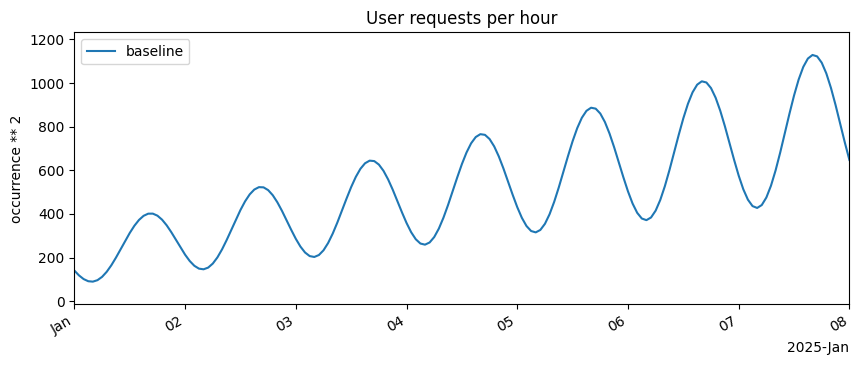

In [7]:
# HOURLY INFERENCE

start_date = datetime.strptime("2025-01-01", "%Y-%m-%d")
timespan = 1 * u.year

inference_pattern_values = linear_growth_hourly_values(
    timespan,
    start_value=24,
    end_value=24,
    start_date=start_date
)
inference_pattern_values.set_label("Hourly ML inference count")

# USER ACTIVITY
user_load = linear_growth_hourly_values(timespan, start_value=200, end_value=20000, start_date=start_date)
daily_modulation = daily_fluct_hourly_values(timespan, fluct_scale=0.6, hour_of_day_for_min_value=4, start_date=start_date)
season_effect = sinusoidal_fluct_hourly_values(timespan, sin_fluct_amplitude=1000, sin_fluct_period_in_hours=24*30*6, start_date=start_date)

hourly_user_events = user_load * daily_modulation + season_effect
hourly_user_events.set_label("User requests per hour")

hourly_user_events.plot(xlims=[start_date, start_date + timedelta(days=7)])

# GENERAL PATTERN
network = Network(
    "WIFI network",
    bandwidth_energy_intensity=SourceValue(0.05 * u("kWh/GB"), Sources.TRAFICOM_STUDY)
)


# Pattern for hourly ML inference
inference_usage_pattern = UsagePattern(
    "Hourly flood inference pattern",
    usage_journey=hourly_inference_journey,
    devices=[Device.laptop()], # TODO : update with actual device
    network=network,
    country=Countries.FRANCE(),
    hourly_usage_journey_starts=inference_pattern_values
)

# Pattern for normal user interactions
user_usage_pattern = UsagePattern(
    "User activity pattern",
    usage_journey=check_status_journey,  # main user request
    devices=[Device.laptop()],
    network=network,
    country=Countries.FRANCE(),
    hourly_usage_journey_starts=hourly_user_events
)

# Final system
system = System(
    "Flood Prediction System",
    usage_patterns=[inference_usage_pattern, user_usage_pattern],
    edge_usage_patterns=[]
)

print(system)


# Results and analysis


2026-01-12 15:30:21,662 - INFO - Calling Boavizta API with url https://api.boavizta.org/v1/cloud/instance/all_providers, method GET and params {}
2026-01-12 15:30:21,938 - INFO - Boavizta API call succeeded in 274 ms.
2026-01-12 15:30:21,942 - INFO - Calling Boavizta API with url https://api.boavizta.org/v1/cloud/instance/all_instances, method GET and params {'provider': 'aws'}
2026-01-12 15:30:22,159 - INFO - Boavizta API call succeeded in 213 ms.
2026-01-12 15:30:22,177 - INFO - Calling Boavizta API with url https://api.boavizta.org/v1/cloud/instance/all_instances, method GET and params {'provider': 'azure'}
2026-01-12 15:30:22,366 - INFO - Boavizta API call succeeded in 187 ms.
2026-01-12 15:30:22,372 - INFO - Calling Boavizta API with url https://api.boavizta.org/v1/cloud/instance/all_instances, method GET and params {'provider': 'scaleway'}
2026-01-12 15:30:22,583 - INFO - Boavizta API call succeeded in 210 ms.
2026-01-12 15:30:22,585 - INFO - Calling Boavizta API with url https:/

user_usage_object_relationships_high_level_view.html
user_usage_object_relationships_infrastructure_view.html
user_usage_device_fabrication_footprint.html
inference_usage_object_relationships_high_level_view.html
inference_usage_object_relationships_infrastructure_view.html
inference_usage_device_fabrication_footprint.html


AssertionError: Cannot plot EmptyExplainableObject if simulation twin is None

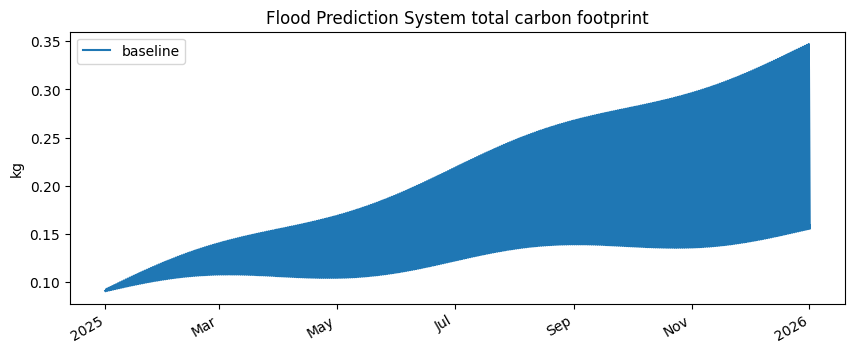

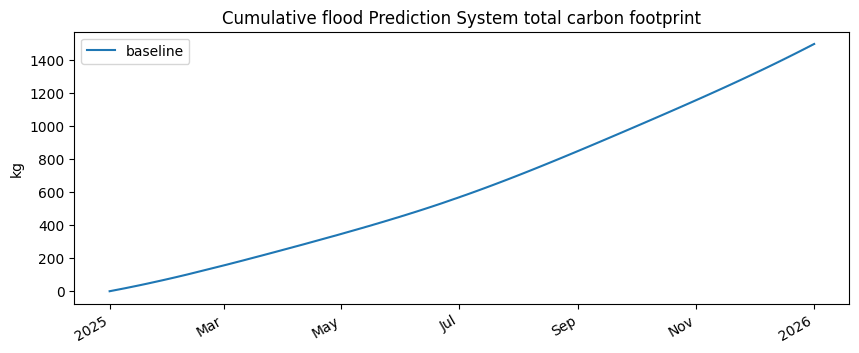

In [8]:


system.plot_footprints_by_category_and_object("System footprints.html")



user_usage_pattern.object_relationship_graph_to_file(
    "user_usage_object_relationships_high_level_view.html",
    width="900px",
    height="550px",
    classes_to_ignore=USAGE_PATTERN_VIEW_CLASSES_TO_IGNORE,
    notebook=True
)

user_usage_pattern.object_relationship_graph_to_file(
    "user_usage_object_relationships_infrastructure_view.html",
    width="900px",
    height="550px",
    classes_to_ignore=INFRA_VIEW_CLASSES_TO_IGNORE,
    notebook=True
)

user_usage_pattern.devices_fabrication_footprint.calculus_graph_to_file(
    "user_usage_device_fabrication_footprint.html",
    width="900px",
    height="550px",
    notebook=True
)



inference_usage_pattern.object_relationship_graph_to_file(
    "inference_usage_object_relationships_high_level_view.html",
    width="900px",
    height="550px",
    classes_to_ignore=USAGE_PATTERN_VIEW_CLASSES_TO_IGNORE,
    notebook=True
)

inference_usage_pattern.object_relationship_graph_to_file(
    "inference_usage_object_relationships_infrastructure_view.html",
    width="900px",
    height="550px",
    classes_to_ignore=INFRA_VIEW_CLASSES_TO_IGNORE,
    notebook=True
)

inference_usage_pattern.devices_fabrication_footprint.calculus_graph_to_file(
    "inference_usage_device_fabrication_footprint.html",
    width="900px",
    height="550px",
    notebook=True
)

system.total_footprint.plot()
system.total_footprint.plot(cumsum=True)

scheduler_vm.energy_footprint.plot()
ml_vm.energy_footprint.plot()
data_vm.energy_footprint.plot()
cleaning_vm.energy_footprint.plot()
gis_vm.energy_footprint.plot()
alerts_vm.energy_footprint.plot()
dashboard_vm.energy_footprint.plot()


# TODO : Twin simluation bug
